In [7]:
import pandas as pd
import numpy as np

In [8]:
bikes = pd.read_csv("bike_sharing.csv")
bikes.head
print(bikes)

In [9]:
#convert the dteday column into day values
bikes['Day'] = pd.DatetimeIndex(bikes['dteday']).day
bikes.head
# Drop the instant dteday and yr values as these dont add any value to our model, to predict cnt
bikes = bikes.drop(['instant','dteday','yr'],axis=1)
print(bikes)

### Checking the correlation between the independent variables using a pair plot. 
### If two independent variables are highly correlated, then one of the variables should be dropped

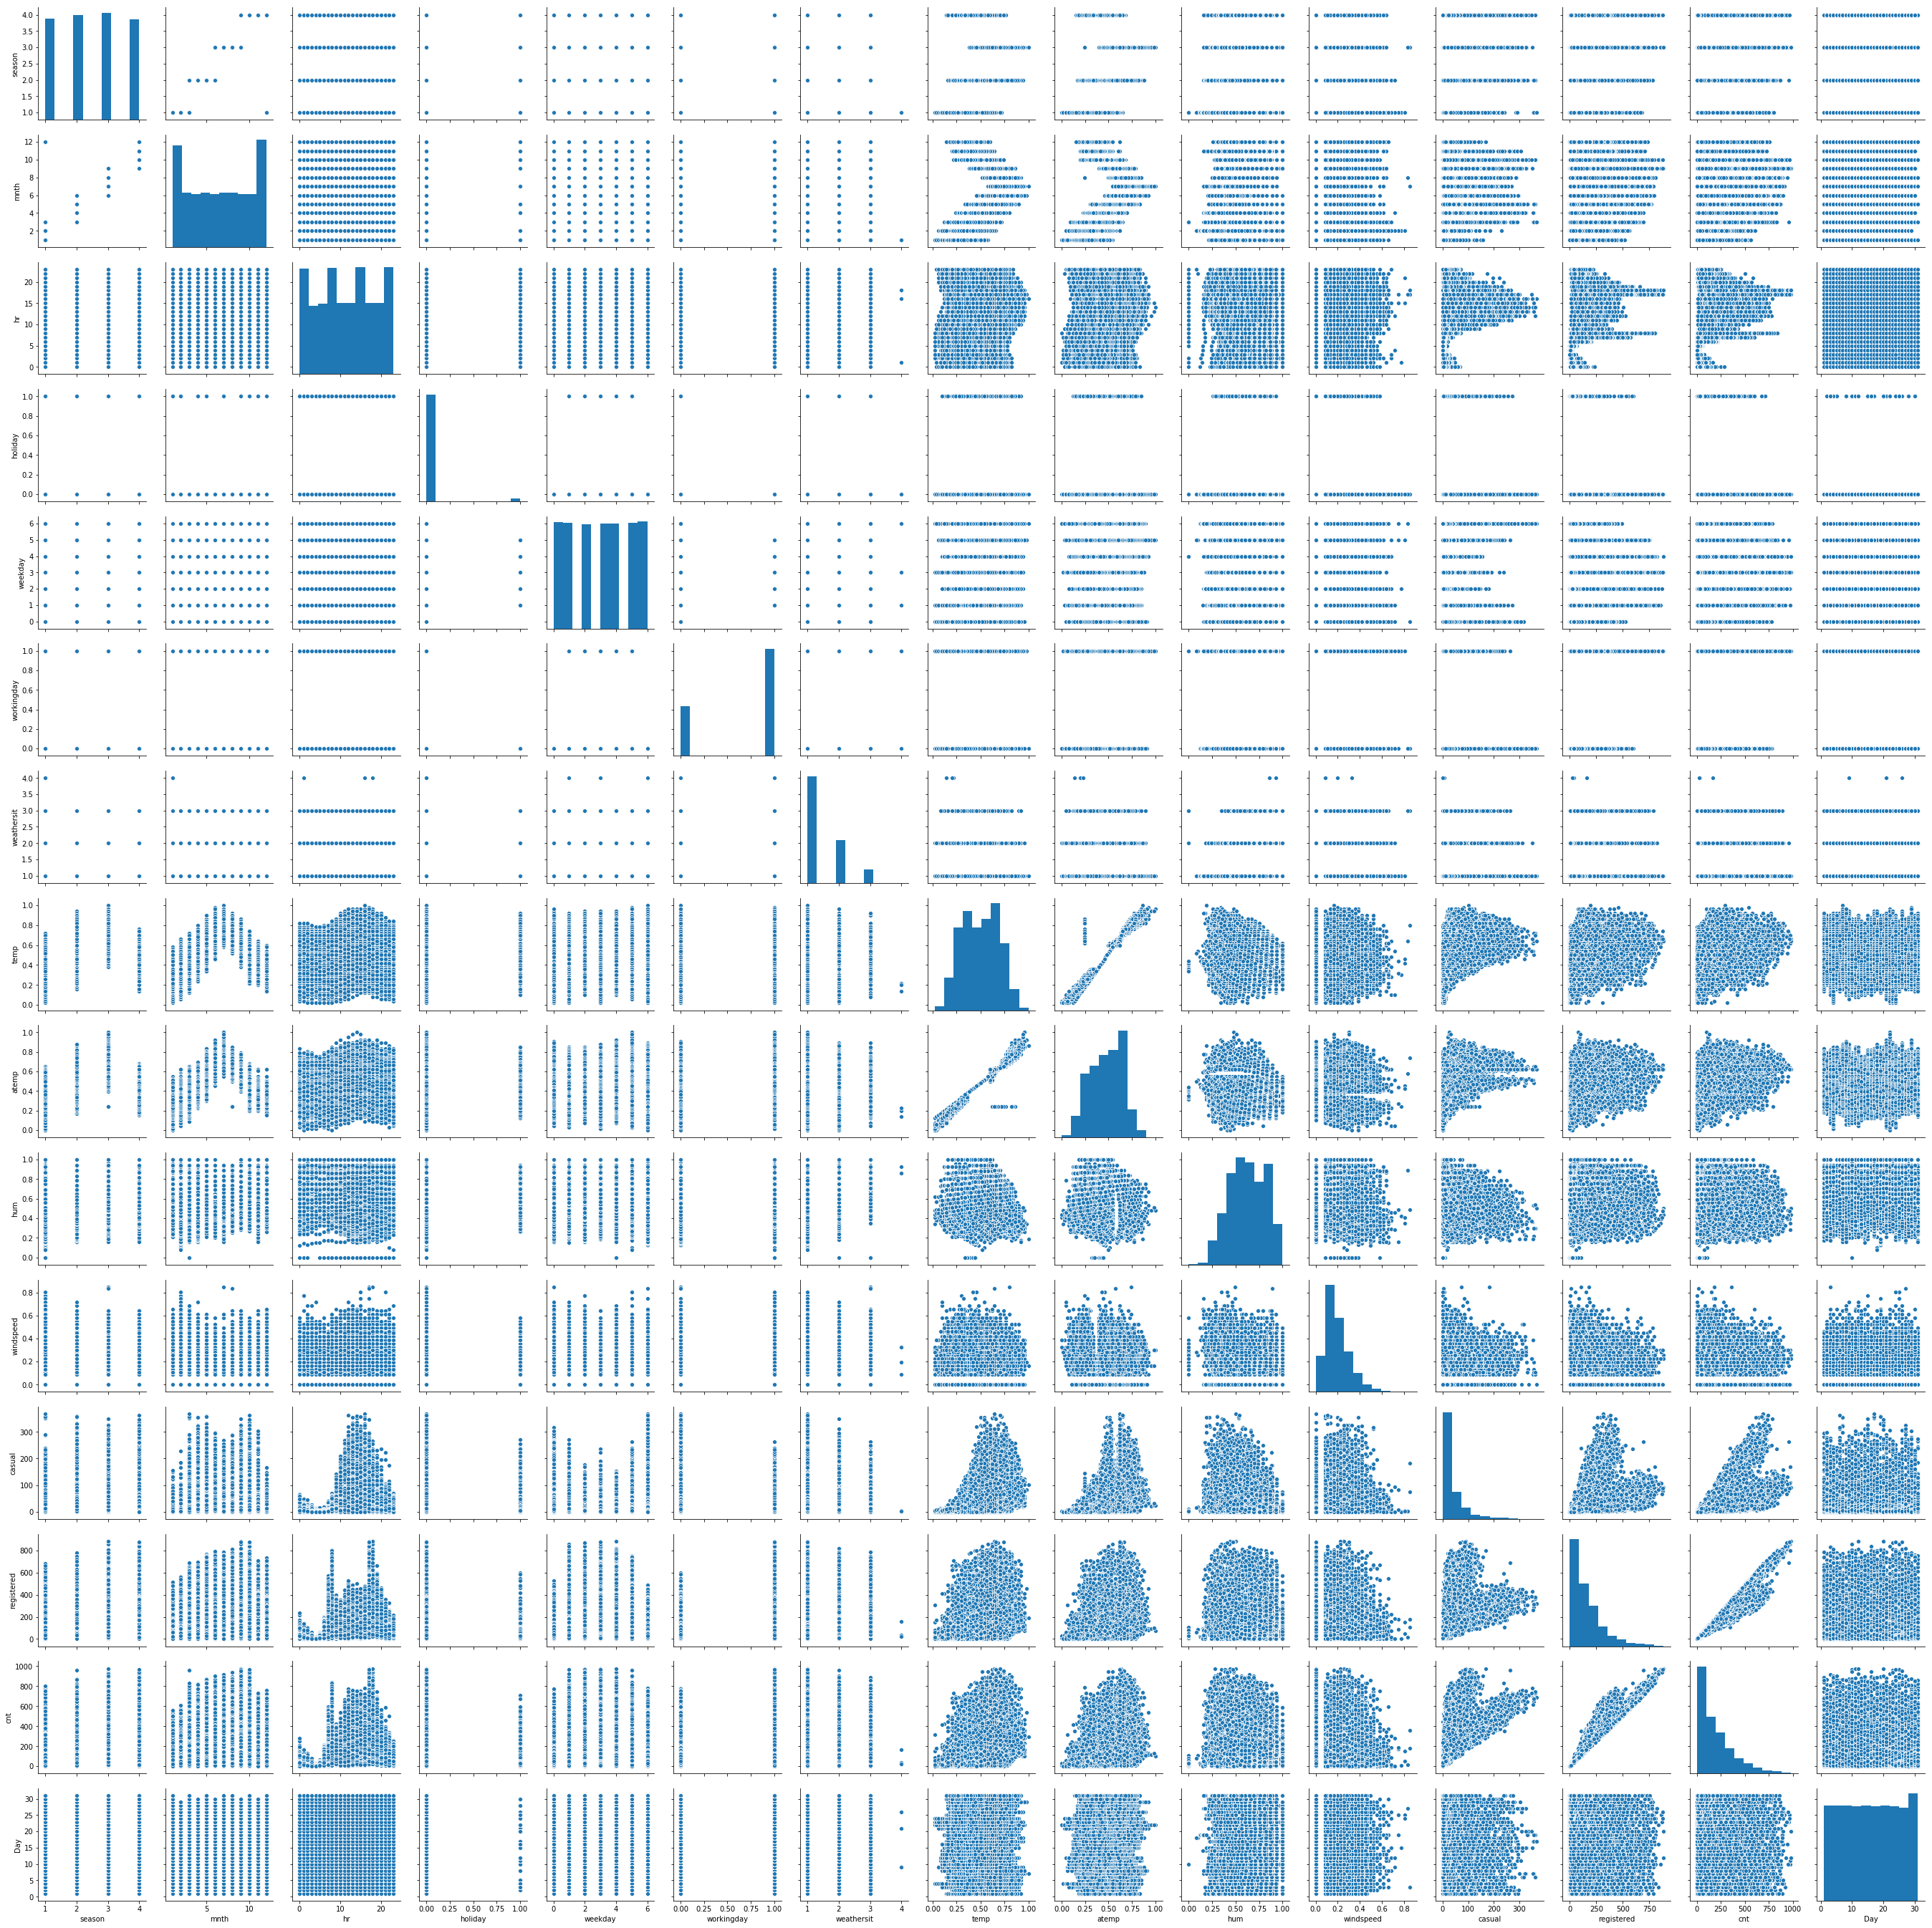

In [10]:
import seaborn as sb
sb.pairplot(bikes)

### From the above plot its seen that temp and atemp are highly correlated

In [11]:
#dropping columns windspeed(many 0 values) and atemp from the bikes dataset
bikes = bikes.drop(['windspeed','atemp'],axis=1)

In [12]:
for col in ['season', 'mnth', 'hr', 'holiday','weekday','workingday','weathersit']:
    bikes[col] = bikes[col].astype('category')


In [13]:
#convert nominal values using pd.get_dummies
def dummify_dataset(df, column):       
    df = pd.concat([df, pd.get_dummies(df[column], prefix=column, drop_first=True)],axis=1)
    df = df.drop([column], axis=1)
    return df

columns_to_dummify = ['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
for column in columns_to_dummify:
    bikes = dummify_dataset(bikes, column)
    
bikes.head()


,temp,hum,casual,registered,cnt,Day,season_2,season_3,season_4,mnth_2,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3,weathersit_4
0,0.24,0.81,3,13,16,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.22,0.80,8,32,40,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.22,0.80,5,27,32,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.24,0.75,3,10,13,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.24,0.75,0,1,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [14]:
np.random.seed(2018)
train = np.random.choice([True, False], bikes.shape[0], replace=True, p=[0.8, 0.2])

bikes_train = bikes.iloc[train,:]
bikes_test = bikes.iloc[~train,:]


In [15]:
#excluding columns casual, registered and cnt in x variable
temp1= bikes_train.loc[:,[i for i in list(bikes_train.columns) if i not in ['casual','registered','cnt']]]
temp2 = bikes_test.loc[:,[i for i in list(bikes_train.columns) if i not in ['casual','registered','cnt']]]

x_train = temp1.as_matrix()
y_train = bikes_train.as_matrix(['casual','registered'])

x_test = temp2.as_matrix()
y_test = bikes_test.as_matrix(['casual','registered'])

print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(13834, 51) (3545, 51)
(13834, 2) (3545, 2)


C:\Users\nithy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
C:\Users\nithy\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\nithy\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\nithy\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


In [16]:
from sklearn import linear_model

In [17]:
regr = linear_model.LinearRegression()

In [18]:
regr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
regr.fit(x_train,y_train)
print('R^2 score: %.2f' % regr.score(x_test, y_test))

R^2 score: 0.61


In [20]:
print('Coefficients:', regr.coef_)
print('\n')
print('Intercept:', regr.intercept_)

Coefficients: [[ 9.85720689e+01 -3.06273795e+01 -4.61777406e-02  9.27270381e+00
   1.58577256e+00  3.00930335e+00 -1.95565806e+00  6.09020599e+00
   3.52487307e+00  3.75072550e+00 -6.56204750e+00 -8.16156344e+00
  -2.71440936e+00  6.21908089e+00  1.05798045e+01  3.61611984e+00
   4.97113668e-02 -2.20698628e+00 -2.66857997e+00 -5.11989305e+00
  -5.64014560e+00 -3.83218902e+00 -4.25450691e-01  5.48626033e+00
   1.36512286e+01  1.95469048e+01  3.10155895e+01  3.98635318e+01
   4.63343464e+01  4.78666853e+01  4.94248168e+01  5.08763519e+01
   4.76481018e+01  4.95753582e+01  3.90659902e+01  2.85915477e+01
   1.86615551e+01  1.34814927e+01  9.00318523e+00  4.31396166e+00
  -6.00529781e+00 -5.50890754e+00 -8.58651381e+00 -8.14101087e+00
  -8.46460524e+00 -7.54547997e-01  5.99769187e+00 -2.54502876e+01
  -3.26525197e+00 -1.14763941e+01 -5.31644783e-01]
 [ 1.95460481e+02 -7.46987485e+01 -1.42715292e-01  2.71958955e+01
   2.60159611e+01  6.70696489e+01  4.96366491e+00 -6.16807396e-01
  -9.432055

In [21]:
from sklearn import metrics

y_pred = regr.predict(x_test)
print(metrics.explained_variance_score(y_test, y_pred))
print("Mean absolute error is " + str(metrics.mean_absolute_error(y_test, y_pred)))
print("Mean square error is " + str(metrics.mean_squared_error(y_test, y_pred)))

0.5913525826289043
Mean absolute error is 44.97004214305907
Mean square error is 4907.392020854146


#### MSE of the linear regression on test data = 4907.39

### Ridge Regression

In [22]:
from numpy.linalg import norm

In [23]:
ridgealpharange = [0.01,0.1,1,10,100]

for j in ridgealpharange:
    ridge = linear_model.Ridge(alpha=j)
    ridge.fit(x_train, y_train)
    print('R^2 score when alpha=' + str(j) + ': %.2f' % ridge.score(x_test, y_test))
    y_pred = ridge.predict(x_test)

    print("MSE is "+ str(metrics.mean_squared_error(y_test, y_pred)))

    a= ridge.coef_
    l2 = norm(a)

    print("Model complexity is " + str(l2))
    print("Regularized Cost function for alpha=" + str(j) + " is " + str(l2 * j))
    print("\n")

R^2 score when alpha=0.01: 0.61
MSE is 4907.377290774519
Model complexity is 758.8294914191375
Regularized Cost function for alpha=0.01 is 7.588294914191375


R^2 score when alpha=0.1: 0.61
MSE is 4907.249374955361
Model complexity is 757.3587362079091
Regularized Cost function for alpha=0.1 is 75.73587362079091


R^2 score when alpha=1: 0.61
MSE is 4906.398382349213
Model complexity is 743.488748852555
Regularized Cost function for alpha=1 is 743.488748852555


R^2 score when alpha=10: 0.61
MSE is 4920.543499663297
Model complexity is 653.1700729777319
Regularized Cost function for alpha=10 is 6531.70072977732


R^2 score when alpha=100: 0.59
MSE is 5165.51785069632
Model complexity is 480.8883355751251
Regularized Cost function for alpha=100 is 48088.83355751251




### Lasso Regression

In [24]:
alpharange = [0.01,0.1,1,10,100]

for i in alpharange:
    lasso = linear_model.Lasso(alpha=i)
    lasso.fit(x_train, y_train)
    print('R^2 score when alpha=' + str(i) + ': %.2f' % lasso.score(x_test, y_test))
    y_pred = lasso.predict(x_test)

    print("MSE is "+ str(metrics.mean_squared_error(y_test, y_pred)))

    b= lasso.coef_
    l1 = norm(b)

    print("Model complexity is " + str(l1))
    print("Regularized Cost function for alpha=" + str(i) + " is " + str(l1 * i))
    print("\n")

R^2 score when alpha=0.01: 0.61
MSE is 4907.439758657497
Model complexity is 744.7138364170432
Regularized Cost function for alpha=0.01 is 7.447138364170432


R^2 score when alpha=0.1: 0.61
MSE is 4931.994068960119
Model complexity is 655.9447512273853
Regularized Cost function for alpha=0.1 is 65.59447512273853


R^2 score when alpha=1: 0.57
MSE is 5505.365596469656
Model complexity is 481.30430696182276
Regularized Cost function for alpha=1 is 481.30430696182276


R^2 score when alpha=10: -0.00
MSE is 12702.344840859414
Model complexity is 0.0
Regularized Cost function for alpha=10 is 0.0


R^2 score when alpha=100: -0.00
MSE is 12702.344840859414
Model complexity is 0.0
Regularized Cost function for alpha=100 is 0.0




#### Alpha of best ridge regression is 10
#### Alpha of best lasso regression is 0.1

## Part 2
#### After analyzing the pair plot, it looks like temperature and weather are the important attributes in predicting the count. Also the alpha value must be considered.

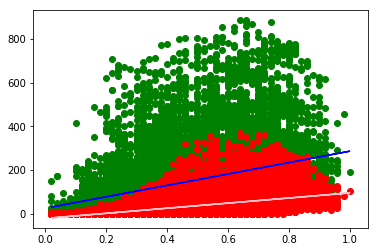

In [97]:
#Scatter plot for temp vs casual and registered
import matplotlib.pyplot as plt

plotx = bikes_train['temp'].values[:,np.newaxis]
ploty = bikes_train['casual'].values
plotz = bikes_train['registered'].values

model1 = linear_model.LinearRegression()
model1.fit(plotx, ploty)
model2 = linear_model.LinearRegression()
model2.fit(plotx, plotz)

plt.scatter(plotx,plotz,color='g')
plt.scatter(plotx,ploty,color='r')
plt.plot(plotx, model1.predict(plotx),color='pink')
plt.plot(plotx, model2.predict(plotx),color='blue')
plt.gray()
plt.show()

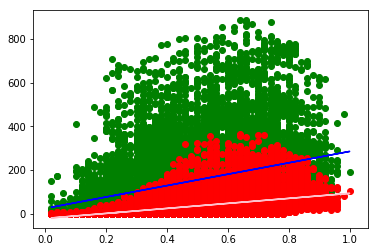

In [100]:
#Scatter plot for temp vs casual and registered - Ridge
import matplotlib.pyplot as plt

plotx = bikes_train['temp'].values[:,np.newaxis]
ploty = bikes_train['casual'].values
plotz = bikes_train['registered'].values

model3 = linear_model.Ridge(alpha=10)
model3.fit(plotx, ploty)
model4 = linear_model.Ridge()
model4.fit(plotx, plotz)

plt.scatter(plotx,plotz,color='g')
plt.scatter(plotx,ploty,color='r')
plt.plot(plotx, model3.predict(plotx),color='pink')
plt.plot(plotx, model4.predict(plotx),color='blue')
plt.gray()
plt.show()

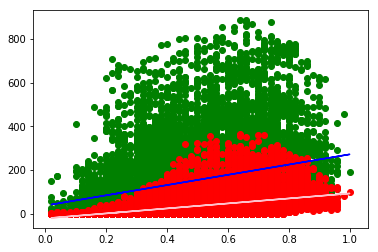

In [101]:
#Scatter plot for temp vs casual and registered - Lasso
import matplotlib.pyplot as plt

plotx = bikes_train['temp'].values[:,np.newaxis]
ploty = bikes_train['casual'].values
plotz = bikes_train['registered'].values

model5 = linear_model.Lasso(alpha=0.1)
model5.fit(plotx, ploty)
model6 = linear_model.Lasso()
model6.fit(plotx, plotz)

plt.scatter(plotx,plotz,color='g')
plt.scatter(plotx,ploty,color='r')
plt.plot(plotx, model5.predict(plotx),color='pink')
plt.plot(plotx, model6.predict(plotx),color='blue')
plt.gray()
plt.show()

In [102]:
def my_linspace(min_value, max_value, steps):
    diff = max_value - min_value
    return np.linspace(min_value - 0.1 * diff, max_value + 0.1 * diff, steps)

In [103]:
steps = 200
x0 = my_linspace(min(x_test[:,0]), max(x_test[:,0]), steps)
x1 = my_linspace(min(x_test[:,1]), max(x_test[:,1]), steps)
xx0, xx1 = np.meshgrid(x0, x1)
mesh_data = np.c_[xx0.ravel(), xx1.ravel()]
#mesh_proba = y_pred.reshape(steps, steps, 2)

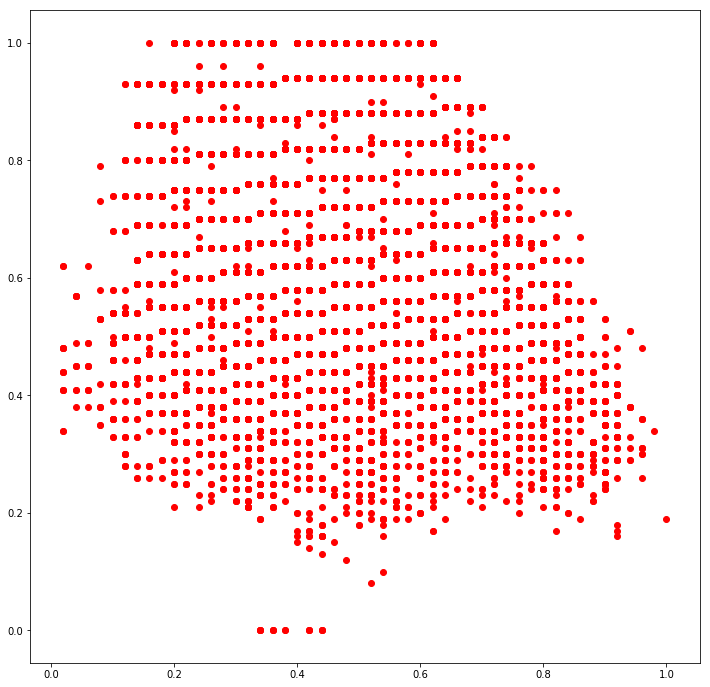

In [105]:
color = ['red', 'green']
#y_color = [color[i] for i in int(y_train)]

plt.figure(figsize=(12, 12))
plt.scatter(x_train[:,0], x_train[:,1], c='red')
#for i in range(2):
    #plt.contourf(xx0, xx1, y_pred, cmap=plt.cm.gray, alpha=0.5)
plt.show()

## Part 3

### For considering more weightage to casual, the MSE can be calculated with additional parameter multioutput, as shown below

In [78]:
w = [[0.8], [0.2]]

y_pred = regr.predict(x_test)
print("Mean square error is " + str(metrics.mean_squared_error(y_test, y_pred,multioutput=[0.8, 0.2])))

Mean square error is 2628.1481960123283


In [83]:
# Running the Ridge regression with weights 0.8 and o.2
ridgealpharange = [0.01,0.1,1,10,100]

for j in ridgealpharange:
    ridge = linear_model.Ridge(alpha=j)
    ridge.fit(x_train, y_train)
    print('R^2 score when alpha=' + str(j) + ': %.2f' % ridge.score(x_test, y_test))
    y_pred = ridge.predict(x_test)

    print("MSE is "+ str(metrics.mean_squared_error(y_test, y_pred,multioutput=[0.8, 0.2])) + "\n")


R^2 score when alpha=0.01: 0.61
MSE is 2628.1427959136854

R^2 score when alpha=0.1: 0.61
MSE is 2628.0962659839633

R^2 score when alpha=1: 0.61
MSE is 2627.821414539504

R^2 score when alpha=10: 0.61
MSE is 2635.1477438243014

R^2 score when alpha=100: 0.59
MSE is 2754.755151112834



In [85]:
# Running the Lasso regression with weights 0.8 and o.2
alpharange = [0.01,0.1,1,10,100]

for i in alpharange:
    lasso = linear_model.Lasso(alpha=i)
    lasso.fit(x_train, y_train)
    print('R^2 score when alpha=' + str(i) + ': %.2f' % lasso.score(x_test, y_test))
    y_pred = lasso.predict(x_test)

    print("MSE is "+ str(metrics.mean_squared_error(y_test, y_pred,multioutput=[0.8, 0.2])) + "\n")


R^2 score when alpha=0.01: 0.61
MSE is 2628.6939749887188

R^2 score when alpha=0.1: 0.61
MSE is 2649.6980556387

R^2 score when alpha=1: 0.57
MSE is 3125.470456497772

R^2 score when alpha=10: -0.00
MSE is 6604.930877789793

R^2 score when alpha=100: -0.00
MSE is 6604.930877789793



#### Alpha can be decreased for best ridge and lasso regression when we use weights.